# Project: Medical Appointment No Shows 

## Table of Contents
<ol>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#fe">Feature Engineering</a></li>    
<li><a href="#log">Machine Learning Model</a></li>    
<li><a href="#conclusions">Conclusions</a></li>
</ol>

<a id='intro'></a>
## 1. Introduction

> This project aims to analyze a dataset from Kaggle called "Medical Appointment No Shows" that contains data from patients thta schedule appointments and the binary information of show or no-show to the appointment. The analyses considers the "no-show" feature as being the dependent variable, which we're trying to explain using our other features (independent variables). Which features have a bigger impact on no-show? Could we create a model to predict no-show based on our features? What would be our accuracy? Let's find out!

<a id='wrangling'></a>
## 2. Data Wrangling

> In this section we will load our data, check for cleanliness, fix data types and handle outliers.


### Import libraries

We start by importing some libraries that will help us in the data wrangling and exploratory analysis process. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the data

In [2]:
# Let's take a first look at our data. 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Basic info about the dataset

We are first looking for missing values and data types at first. So we can clean our dateset!

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


So we found out that we don't have missing values in this dataset, but we do need to apply different data types
in date fields, because they're returning objects.

### Duplicated values

Now we're looking for duplicated rows, so we can delete them. 

In [4]:
df.duplicated().sum()

0

So when don't have any, great! We're assuming all rows are unique.

#### Lowering column names

We're gonna lower all the column names, just so we don't have to remember lower and upper cases.

In [5]:
df.columns = [x.lower() for x in df.columns]
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### Recurrent patients 

Let's see how many patients our recurrent in our dataset, and let's take a brief look at some of them.

In [6]:
df_d = df["patientid"]
df_d.duplicated().sum()

48228

We see there's a lot of duplicate values. We just wanna check out those values fist and get more into that later.

In [7]:
df[df_d.isin(df_d[df_d.duplicated()])].sort_values(by='patientid').head(6)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
58616,22638656.0,5580835,F,2016-04-14T07:23:30Z,2016-05-03T00:00:00Z,22,INHANGUETÁ,0,0,0,0,0,1,No
88585,22638656.0,5715081,F,2016-05-18T13:37:12Z,2016-06-08T00:00:00Z,23,INHANGUETÁ,0,0,0,0,0,1,No
83628,52168938.0,5704816,F,2016-05-16T16:42:19Z,2016-05-16T00:00:00Z,28,JARDIM DA PENHA,0,0,0,0,0,0,No
49826,52168938.0,5607220,F,2016-04-20T11:22:15Z,2016-05-17T00:00:00Z,28,JARDIM DA PENHA,0,0,0,0,0,0,No
11009,64851211.0,5683383,F,2016-05-11T07:28:23Z,2016-05-13T00:00:00Z,29,MARUÍPE,0,0,0,0,0,0,Yes
6674,64851211.0,5697532,F,2016-05-13T16:22:26Z,2016-05-17T00:00:00Z,29,MARUÍPE,0,0,0,0,0,0,No


### Unique values

We're gonna check out the number of uniques values for each variable, just to get more acquainted with our data.

In [8]:
df.nunique()

patientid          62299
appointmentid     110527
gender                 2
scheduledday      103549
appointmentday        27
age                  104
neighbourhood         81
scholarship            2
hipertension           2
diabetes               2
alcoholism             2
handcap                5
sms_received           2
no-show                2
dtype: int64

So we can see here that we have some duplicated patientid values, which is going to be interesting because we can check how many patients really do come back another time or never come back at all. Or if their behavior is a pattern.

We can see that we're looking at a 27 day period of time. 

We also see that the handcap is not binary, so we'll have to get rid of some values or replace them. 

### No-shows 

Now, let's take a look at our no-shows. 

In [9]:
df['no-show'].value_counts()

No     88208
Yes    22319
Name: no-show, dtype: int64

So 22% of appointments have a no-show.

### Fixing Data Types

We're gonna change the date data types from string to datatime64:

- scheculedday;
- appointmentday.

In [10]:
df['scheduledday'] = df['scheduledday'].astype('datetime64[ns]')
df['appointmentday'] = df['appointmentday'].astype('datetime64[ns]')

Let's check again the data types!

In [11]:
df.dtypes

patientid                float64
appointmentid              int64
gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
no-show                   object
dtype: object

Great!

## Outliers

Now we'll start looking for outliers.Looking at our dataset, they would probably be in our age column. 

Let's first see how the distribution of age is looking considering no-show as hue.

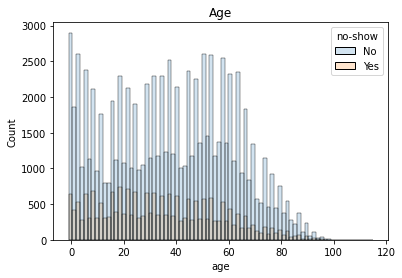

In [12]:
plt.title('Age')
sns.histplot(data=df, x="age", bins=80, hue="no-show", alpha=0.2);

Now let's check out the boxplot of age. 

Text(0, 0.5, 'Age values')

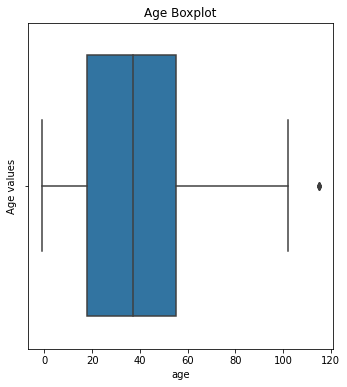

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1);
fig = sns.boxplot(x='age', data=df)
fig.set_title('Age Boxplot')
fig.set_ylabel('Age values')

Yup. There're our outliers, we have to get rid of them. Let's first take a look at them. 

In [15]:
df[df['age'] > 100]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
58014,9.762948e+14,5651757,F,2016-05-03 09:14:53,2016-05-03,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51,2016-05-30,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31 10:19:49,2016-06-02,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19 07:57:56,2016-06-03,115,SÃO JOSÉ,0,1,0,0,0,1,No


### Replacing outliers
So now, we know that they're all female, with similar characteristics, and specific neighbourhoods. To get rid of our outliers, 
we're gonna use the mean of each neighbourhood for a more precise replacement. 

First, we get the mean of each neighbourhood. Those will be our values for replacement. 

a) Andorinhas

In [16]:
df_AND = df[df['neighbourhood'] == 'ANDORINHAS']
df_AND['age'].mean()

36.10610079575597

b) Maria Ortiz

In [17]:
df_MAR = df[df['neighbourhood'] == 'MARIA ORTIZ']
df_MAR['age'].mean()

35.27579672695952

c) Conquista

In [18]:
df_CON = df[df['neighbourhood'] == 'CONQUISTA']
df_CON['age'].mean()

31.879858657243815

d) São José

In [19]:
df_SAO = df[df['neighbourhood'] == 'SÃO JOSÉ']
df_SAO['age'].mean()

33.61355589276682

Now, we're gonna replace the outliers with the age's means of each neighbourhood

In [20]:
df['age'] = np.where(((df['age'] > 100)& (df['neighbourhood'] == 'ANDORINHAS')), 36, df['age'])
df['age'] = np.where(((df['age'] > 100)& (df['neighbourhood'] == 'MARIA ORTIZ')), 35, df['age'])
df['age'] = np.where(((df['age'] > 100)& (df['neighbourhood'] == 'CONQUISTA')), 32, df['age'])
df['age'] = np.where(((df['age'] > 100)& (df['neighbourhood'] == 'SÃO JOSÉ')), 33, df['age'])

Let's check if we did get rid of them. 

Text(0, 0.5, 'Age values')

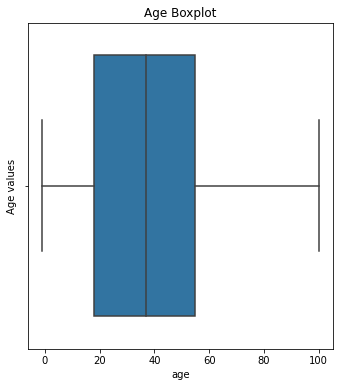

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
fig = sns.boxplot(x='age', data=df);
fig.set_title('Age Boxplot')
fig.set_ylabel('Age values')

We did!

## Ensuring binary info

We saw that handcap has more than 2 unique values, so we'll transform it to a binary variable.

First, let's take a look at the rows containing values different from 0 AND 1.

In [22]:
df_hc_dif = df[(df['handcap']!= 1) & (df['handcap'] != 0)]
df_hc_dif.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
946,7.282582e+13,5582483,M,2016-04-14 09:26:08,2016-04-29,94,BELA VISTA,0,1,1,0,2,1,No


Now, we're going to perform a loop to replace all of our values different than 0 or 1 to 1. And we'll check if it worked!

In [23]:
for x in df['handcap']:
    if (x != 0) & (x != 0):
        df['handcap'].replace(x, 1, inplace=True)
df['handcap'].value_counts()

0    108286
1      2241
Name: handcap, dtype: int64

Great! NOW we have our binary variable.

<a id='eda'></a>
## 3. Exploratory Data Analysis

> We'll be checking the correlation between different independent variables and our dependent variable "no-show".

- Gender: do we have more females or males with no-shows?
- Age: are younger or older patients having more no-shows?
- Neighbourhood: are there certain neighbouhoods with a higher no-show percentage?
- Scheduled day: do the scheduling month or day of the week have an impact on no-show?
- Appointment day: are there any patters of no-show?


Let's start creating two separate datasets: no-show and show.

In [24]:
df_n = df[df['no-show'] == 'No']
df_n.head(5)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [25]:
df_y = df[df['no-show'] == 'Yes']
df_y.head(5)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28 09:28:57,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27 07:51:14,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


## Gender

Let's first take a look at the percentage of no-shows in each value of gender. 

In [26]:
df_perc_gender =  df[df["no-show"]=='Yes'].value_counts(["gender"]) /  df.value_counts(["gender"])
df_perc_gender.sort_values(ascending = False)

gender
F         0.203146
M         0.199679
dtype: float64

We see that they're both around 20% with not much of a difference. 

We could also check that distribution through a histplot. 

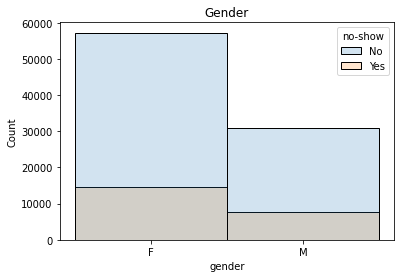

In [27]:
plt.title('Gender')
sns.histplot(data=df, x="gender", hue="no-show", alpha=0.2);

## Age

Let's also check the percentage of no-shows for age. 

In [28]:
df_perc_age =  df[df["no-show"]=='Yes'].value_counts(["age"]) /  df.value_counts(["age"])
df_perc_age.sort_values(ascending = False).head(10)

age
14     0.282648
13     0.274705
15     0.265896
9      0.265306
25     0.264264
17     0.262425
24     0.258454
22     0.255087
19     0.255016
23     0.254262
dtype: float64

We can see that our top 10 percentages of no-show are around patients with 10 - mid 20s. That's interesting.

We could also check out our age histplot with no-show as hue.

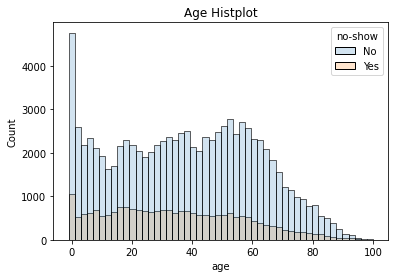

In [29]:
plt.title('Age Histplot')
sns.histplot(data=df, x="age", hue="no-show", bins = 50, alpha=0.2);

Let's also check the histograms separately to get a better understanding about the distribution of age for both shows and no-shows.

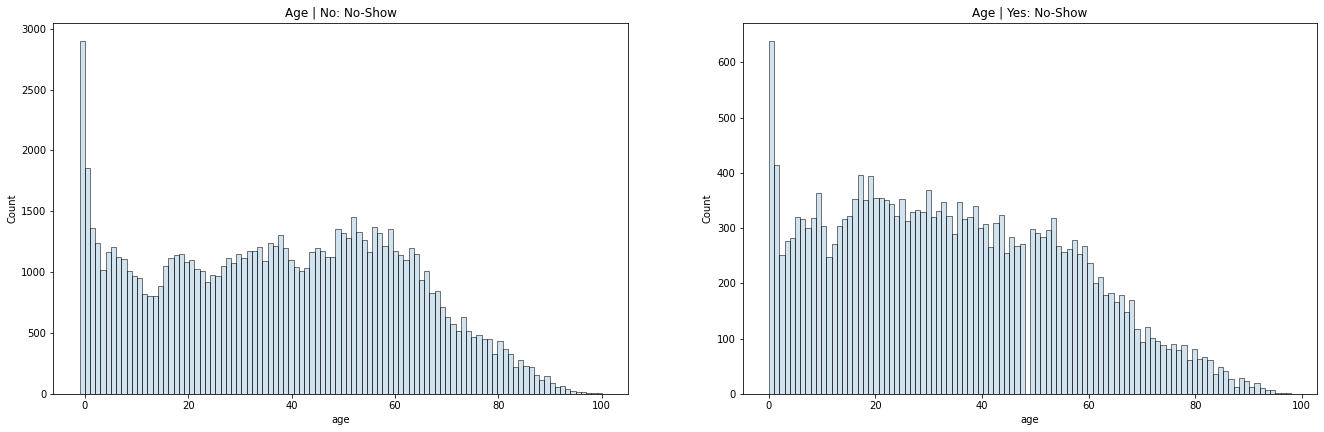

In [30]:
fig = plt.figure(figsize=(35,15))

#  subplot #1
plt.subplot(231)
plt.title('Age | No: No-Show')
sns.histplot(data=df_n, x='age', bins = 100, alpha=0.2);

#  subplot #2
plt.subplot(232)
plt.title('Age | Yes: No-Show')
sns.histplot(data=df_y, x='age', bins = 100, alpha=0.2);

We can see that no-shows are more skewed to the right!

## Binary variables

Let's start by getting the percentages of show and no-show in each binary variable.

### Scholarship

In [31]:
df_perc_sc =  df[df["no-show"]=='Yes'].value_counts(["scholarship"]) /  df.value_counts(["scholarship"])
df_perc_sc.sort_values(ascending = False)

scholarship
1              0.237363
0              0.198072
dtype: float64

We see that scholarship = 1 has a higher percentage of no-shows. Interesting!

### Hipertension

In [32]:
df_perc_ht =  df[df["no-show"]=='Yes'].value_counts(["hipertension"]) /  df.value_counts(["hipertension"])
df_perc_ht.sort_values(ascending = False).head(10)

hipertension
0               0.209037
1               0.173020
dtype: float64

Hipertension actually has a lower no-show percentage.

### Diabetes

In [33]:
df_perc_di =  df[df["no-show"]=='Yes'].value_counts(["diabetes"]) /  df.value_counts(["diabetes"])
df_perc_di.sort_values(ascending = False).head(10)

diabetes
0           0.203628
1           0.180033
dtype: float64

Diabetes also has a lower no-show percentage!

### Alcoholism

In [34]:
df_perc_al =  df[df["no-show"]=='Yes'].value_counts(["alcoholism"]) /  df.value_counts(["alcoholism"])
df_perc_al.sort_values(ascending = False).head(10)

alcoholism
0             0.201946
1             0.201488
dtype: float64

Alcoholism is pretty similar!

### Handcap

In [35]:
df_perc_hc =  df[df["no-show"]=='Yes'].value_counts(["handcap"]) /  df.value_counts(["handcap"])
df_perc_hc.sort_values(ascending = False).head(10)

handcap
0          0.202353
1          0.181615
dtype: float64

Handcap also has a lower no-show percentage.

### SMS received

In [36]:
df_perc_sms =  df[df["no-show"]=='Yes'].value_counts(["sms_received"]) /  df.value_counts(["sms_received"])
df_perc_sms.sort_values(ascending = False).head(10)

sms_received
1               0.275745
0               0.167033
dtype: float64

`WOW`. Now THAT's really interesting. We would've thought that sms_received would that a positive impact on reducing no-shows. But we actually have a much higher percentage of no-shows in sms_received. 

## Neighbourhood

Let's also first take a look at no-show percentages, and get our top 10.

In [37]:
df_perc_neig =  df[df["no-show"]=='Yes'].value_counts(["neighbourhood"]) /  df.value_counts(["neighbourhood"])
df_perc_neig.sort_values(ascending = False).head(10)

neighbourhood              
ILHAS OCEÂNICAS DE TRINDADE    1.000000
SANTOS DUMONT                  0.289185
SANTA CECÍLIA                  0.274554
SANTA CLARA                    0.264822
ITARARÉ                        0.262664
JESUS DE NAZARETH              0.243954
HORTO                          0.240000
ILHA DO PRÍNCIPE               0.234775
CARATOÍRA                      0.230409
ANDORINHAS                     0.230327
dtype: float64

Let's look at the distribution of percentages.

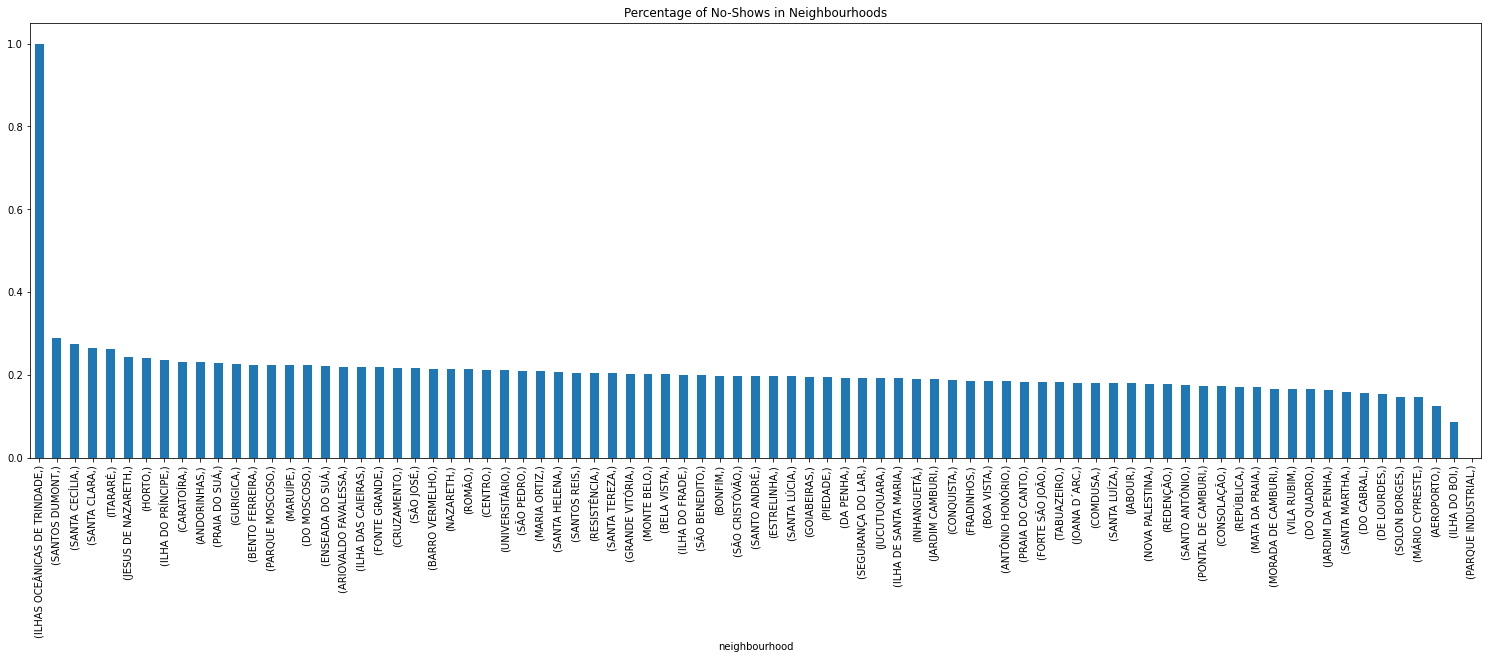

In [38]:
fig = plt.figure(figsize=(26,8))
plt.title('Percentage of No-Shows in Neighbourhoods')
df_perc_neig.sort_values(ascending = False).plot.bar();

We can't really see the shape because "ILHAS OCEÂNICAS DE TRINDADE" is much higher. I already checked the rows with that neighbourhood and we only have two values. So we can drop that value for now to take a closed look at our distribution.

In [39]:
df_perc_neig.drop(['ILHAS OCEÂNICAS DE TRINDADE'], inplace= True)

c:\users\ugalem4\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:4152: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


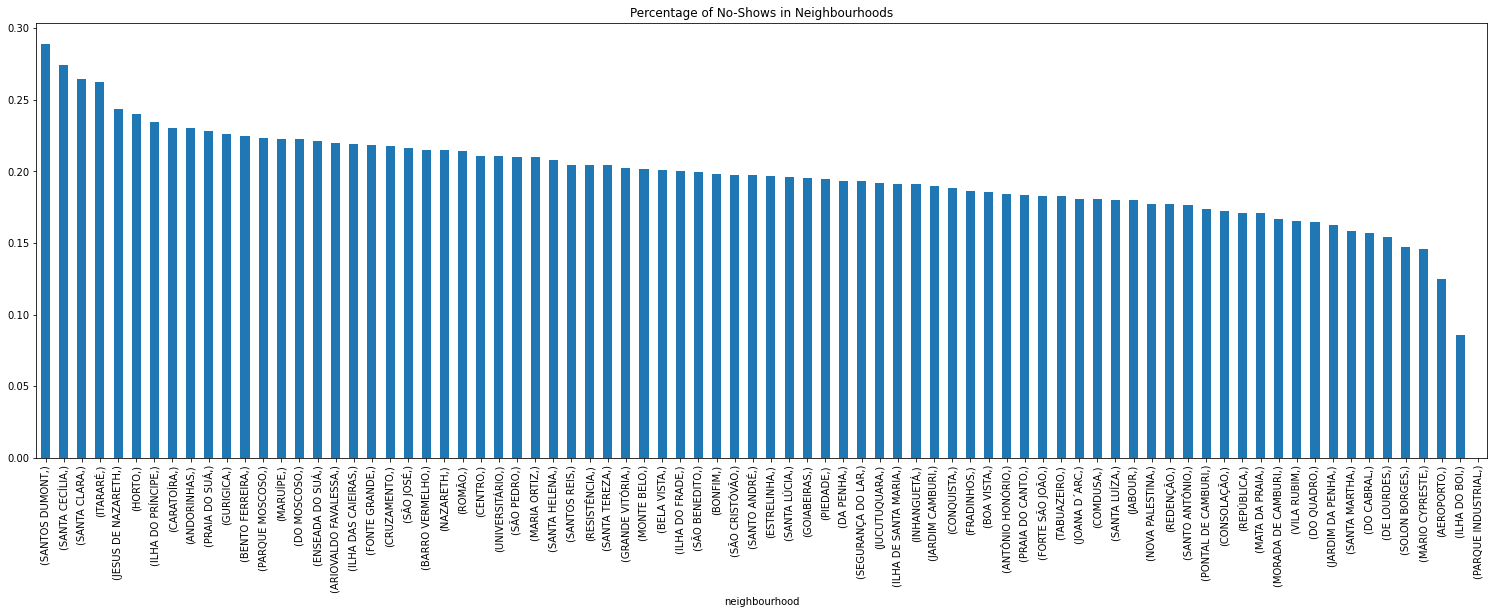

In [40]:
fig = plt.figure(figsize=(26,8))
plt.title('Percentage of No-Shows in Neighbourhoods')
df_perc_neig.sort_values(ascending = False).plot.bar();

We see that we have 4 neighbourhoods with a higher no-show percentage. We may use them as binary features in our model. 
SANTOS DUMOND, SANTA CECÍLIA, SANTA CLARA and ITARARÉ. We won't be using ILHAS OCEÂNICAS because we only had 2 rows.

## Scheduled Day

Now, let's deep dive into our datetime columns. We'll start with scheduled day.

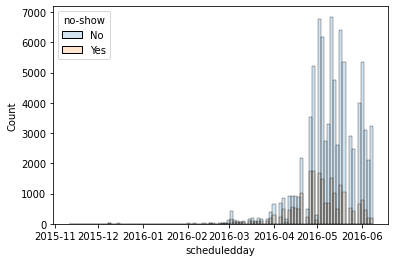

In [41]:
sns.histplot(data=df, x="scheduledday", hue="no-show", bins = 100, alpha=0.2);

We clearly have some correlation of scheduled day and no-show around 2016-03 and 2016-04, we'll have to investigate some more.

### Scheduled Month

Let's see if scheduled month is a good indicator of no-show.

First, let's create a new variable `m_scheduledday` for the month of scheduled day.

In [42]:
df['m_scheduledday'] = pd.to_datetime(df['scheduledday']).dt.month_name()
df['m_scheduledday'].astype('str')

0         April
1         April
2         April
3         April
4         April
          ...  
110522      May
110523      May
110524    April
110525    April
110526    April
Name: m_scheduledday, Length: 110527, dtype: object

Let's check our percentages.

In [43]:
df_perc_schmonth =  df[df["no-show"]=='Yes'].value_counts(["m_scheduledday"]) /  df.value_counts(["m_scheduledday"])
df_perc_schmonth.sort_values(ascending = False).head(10)

m_scheduledday
March             0.330935
December          0.311475
April             0.309760
January           0.300000
February          0.291815
May               0.174560
June              0.100800
November               NaN
dtype: float64

So around Dec - Apr we have a no-show percentage around 30%. Much higher than May - June. That's interesting. Let's also check our value_counts. 

In [44]:
df['m_scheduledday'].value_counts()

May         67421
April       25339
June        13750
March        3614
February      281
December       61
January        60
November        1
Name: m_scheduledday, dtype: int64

We see that around Dec - March we have less values. That's also interesting. We would have to be careful when infering behavior with less data.

### Scheduled day of the week

Now, let's create a new variable `dw_scheduledday` for the day of the week of scheduled day.

In [45]:
df['dw_scheduledday'] = pd.to_datetime(df['scheduledday']).dt.day_name()

And let's check our percentages of no-show.

In [46]:
df_perc_schdw =  df[df["no-show"]=='Yes'].value_counts(["dw_scheduledday"]) /  df.value_counts(["dw_scheduledday"])
df_perc_schdw.sort_values(ascending = False).head(10)

dw_scheduledday
Friday             0.205498
Thursday           0.204725
Tuesday            0.202194
Wednesday          0.201096
Monday             0.197574
Saturday           0.041667
dtype: float64

We can see that scheduled days during the week have a no-show percentage around 20%, while saturday has a no-show percentage of around 4%. Interesting. However, let's check the value counts to see if we have a much lower number of appointments being scheduled on saturdays.

In [47]:
df['dw_scheduledday'].value_counts()

Tuesday      26168
Wednesday    24262
Monday       23085
Friday       18915
Thursday     18073
Saturday        24
Name: dw_scheduledday, dtype: int64

Yup. Just like we imagined. 

We could also check the distribution of day of the week and month of scheduled day through histplot. Let's do it.

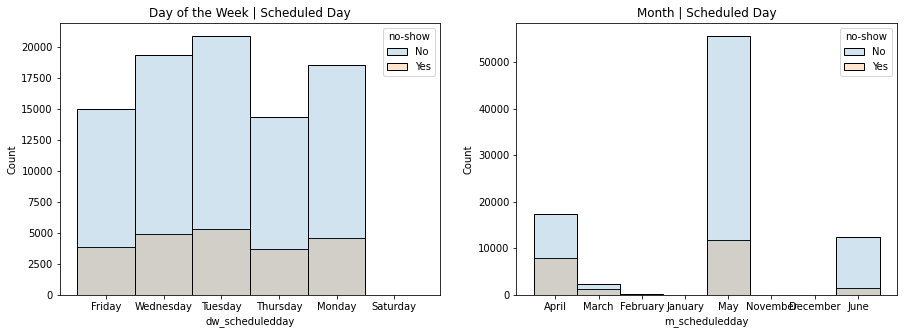

In [48]:
fig = plt.figure(figsize=(15,5))
# subplot 1
plt.subplot(121)
plt.title('Day of the Week | Scheduled Day')
sns.histplot(data=df, x='dw_scheduledday', bins = 7, hue="no-show", alpha=0.2);

# subplot 2
plt.subplot(122)
plt.title('Month | Scheduled Day')
sns.histplot(data=df, x='m_scheduledday', hue="no-show", bins = 12, alpha=0.2);

## Appointment Day

Now, let's investigate some patterns in appointment days. We already no we're looking at a 27 day spare. Let's take a look at the distribution. 

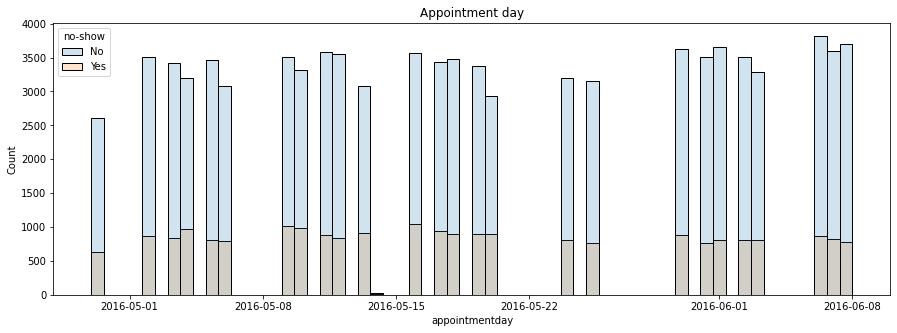

In [49]:
fig  = plt.figure(figsize=(15,5))
plt.title('Appointment day')
sns.histplot(data=df, x="appointmentday", hue="no-show", bins = 60, alpha=0.2); 

And we don't see a clear correlation here. So we won't really deep dive. However, wouldn't it be cool to find out if the delta days between scheduled and appointment day have a correlation with no-shows?

<a id='fe'></a>
## 4. Feature Engineering

In this section, we'll create some new variables to extract more value from our dataset. Wouldn't it be interesting to check the correlation between not only delta days but also recurrent patients with no-shows?

### Delta Days

One feature that would be interesting to explore would be number of days between the scheduled and appointment day. Does that have an impact on no-show?

Let's build that feature.

In [50]:
df['delta_days'] = df['appointmentday'] - df['scheduledday']

In [51]:
df.head(5)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,m_scheduledday,dw_scheduledday,delta_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,April,Friday,-1 days +05:21:52
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,April,Friday,-1 days +07:51:33
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,April,Friday,-1 days +07:40:56
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,April,Friday,-1 days +06:30:29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,April,Friday,-1 days +07:52:37


Now let's ensure our `delta_days` variable is a string so we can split it and extract only the numbers.

In [52]:
df['delta_days'] = df['delta_days'].astype('str')

So we got a string that looks like this "-1 days +05:21:52". But we only want the days. Also, when the appointment is at the same day of the scheduled day, we want the value "0", not "-1". Let's fix that.

Let's first extract the number of days. We'll split our column starting from the word "days".

In [53]:
df[['days_delta', 'time']] = df.delta_days.str.rsplit("days", expand=True)

Let's see how it looks.

In [54]:
df.head(5)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,m_scheduledday,dw_scheduledday,delta_days,days_delta,time
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,April,Friday,-1 days +05:21:52,-1,+05:21:52
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,April,Friday,-1 days +07:51:33,-1,+07:51:33
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,April,Friday,-1 days +07:40:56,-1,+07:40:56
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,April,Friday,-1 days +06:30:29,-1,+06:30:29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,April,Friday,-1 days +07:52:37,-1,+07:52:37


Now let's drop the excess columns we don't need: `delta_days` and `time`.

In [55]:
df.drop(['delta_days', 'time'], axis=1, inplace = True)

Let's see how our datasets looks again.

In [56]:
df.head(0)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,m_scheduledday,dw_scheduledday,days_delta


Now we'll convert the data from string to float.

In [57]:
df['days_delta'] = df['days_delta'].astype('float')

Let's check.

In [58]:
df.dtypes

patientid                 float64
appointmentid               int64
gender                     object
scheduledday       datetime64[ns]
appointmentday     datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hipertension                int64
diabetes                    int64
alcoholism                  int64
handcap                     int64
sms_received                int64
no-show                    object
m_scheduledday             object
dw_scheduledday            object
days_delta                float64
dtype: object

Great!

We also realized we need to increase all of our values from `days_delta` by +1. Let's do it.

In [59]:
df['days_delta'] = df['days_delta'].apply(lambda x: x+1)
df['days_delta']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
110522    35.0
110523    35.0
110524    41.0
110525    41.0
110526    41.0
Name: days_delta, Length: 110527, dtype: float64

Now let's take a look at the distribution of delta days with no-show as hue.

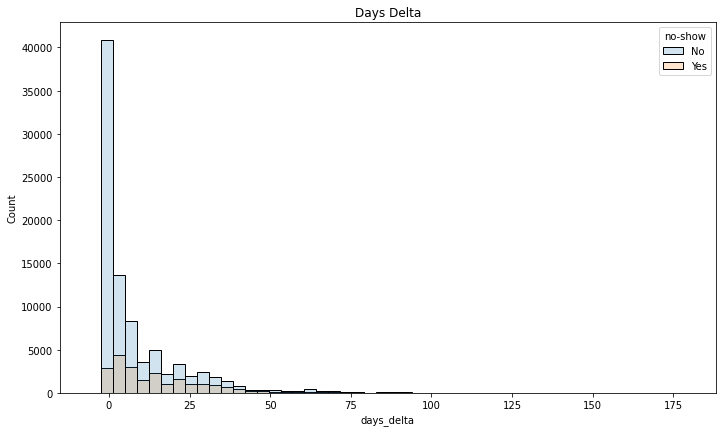

In [60]:
fig = plt.figure(figsize=(40,15))

plt.subplot(231)
plt.title('Days Delta')
sns.histplot(data=df, x='days_delta', bins = 50, hue="no-show", alpha=0.2);

We can kind of see a correlation here. Let's check our percentages. 

In [61]:
df_perc_delta_d =  df[df["no-show"]=='Yes'].value_counts(["days_delta"]) /  df.value_counts(["days_delta"])
df_perc_delta_d.sort_values(ascending = False).head(20)

days_delta
-6.0          1.000000
-1.0          1.000000
 151.0        1.000000
 146.0        1.000000
 139.0        1.000000
 132.0        1.000000
 126.0        1.000000
 104.0        0.750000
 155.0        0.600000
 103.0        0.600000
 110.0        0.500000
 55.0         0.449541
 80.0         0.444444
 60.0         0.424658
 89.0         0.411765
 40.0         0.405512
 25.0         0.401884
 81.0         0.400000
 78.0         0.393939
 79.0         0.391304
dtype: float64

Well we can see a positive correlation between delta days and no-show. We can also see some weird values: -1 and -6. How can someone schedule an appointment for a day that have already passed? We can clearly see some system's issue here.

In [62]:
df[df['days_delta'] == -6]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,m_scheduledday,dw_scheduledday,days_delta
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,May,Wednesday,-6.0


### Recurrent patients

Now, we'll start analysing how recurrent and single appointment patients behave.

We'll start by getting rid of our scientific notation for patient id.

In [64]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Now, let's see how the duplicated patientid are behaving in our dataset.

First, let's just take a brief look.

In [65]:
df[df['patientid'].duplicated(keep=False) == True].sort_values(by='patientid', ascending = False).head(20)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,m_scheduledday,dw_scheduledday,days_delta
104616,999931985292928.00000,5772701,M,2016-06-03 16:04:03,2016-06-07,90,JABOUR,0,0,0,0,0,1,No,June,Friday,4.00000
62099,999931985292928.00000,5700484,M,2016-05-16 09:29:43,2016-05-17,90,JABOUR,0,0,0,0,0,0,No,May,Monday,1.00000
62194,999931985292928.00000,5616762,M,2016-04-25 14:46:41,2016-05-04,90,JABOUR,0,0,0,0,0,1,No,April,Monday,9.00000
32033,999931985292928.00000,5736368,M,2016-05-25 08:14:58,2016-05-25,90,JABOUR,0,0,0,0,0,0,No,May,Wednesday,0.00000
32023,999931985292928.00000,5710157,M,2016-05-17 15:22:01,2016-05-17,90,JABOUR,0,0,0,0,0,0,No,May,Tuesday,0.00000
77401,999877415842165.00000,5660015,M,2016-05-04 15:19:22,2016-05-05,13,SANTO ANTÔNIO,0,0,0,0,0,0,No,May,Wednesday,1.00000
88851,999877415842165.00000,5777078,M,2016-06-06 12:56:18,2016-06-06,13,SANTO ANTÔNIO,0,0,0,0,0,0,No,June,Monday,0.00000
47852,999831834585814.00000,5663204,M,2016-05-05 09:39:58,2016-05-06,57,MARUÍPE,0,0,1,0,0,0,No,May,Thursday,1.00000
47701,999831834585814.00000,5681860,M,2016-05-10 15:16:56,2016-05-18,57,MARUÍPE,0,0,1,0,0,0,No,May,Tuesday,8.00000
66111,999831834585814.00000,5648954,M,2016-05-02 17:08:17,2016-05-02,57,MARUÍPE,0,0,1,0,0,0,No,May,Monday,0.00000


We see something weird. Two rows: 51731 and 80676 for the same patient and same scheduling day for two different appointment days. Weird. And one No-show and one Show. Which is expected. That must be a system's issue. 

Now we'll duplicate our patient id column so we can play around with it and not lose data.

In [66]:
df['patientid2'] = df['patientid']

Let's see how many duplicate rows we have based on patient id and scheduled day.

We'll start by creating a new column for the date of scheduled day, without the time.

In [67]:
df['date_sch'] = df['scheduledday'].dt.date
df.head(5)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,m_scheduledday,dw_scheduledday,days_delta,patientid2,date_sch
0,29872499824296.00000,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,April,Friday,0.00000,29872499824296.00000,2016-04-29
1,558997776694438.00000,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,April,Friday,0.00000,558997776694438.00000,2016-04-29
2,4262962299951.00000,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,April,Friday,0.00000,4262962299951.00000,2016-04-29
3,867951213174.00000,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,April,Friday,0.00000,867951213174.00000,2016-04-29
4,8841186448183.00000,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,April,Friday,0.00000,8841186448183.00000,2016-04-29


Now let's create a new dataset for our duplicates.

In [68]:
df_dupl = df[df.duplicated(subset = ['patientid', 'date_sch'])]
df_dupl.shape

(11468, 19)

WOW. A lot: 11468 rows. Let's see the percentage of no-shows here in this duplicates dataset.

In [69]:
df_perc_dupl_y =  len(df_dupl[df_dupl["no-show"]=='Yes']) /  len(df_dupl.index)
df_perc_dupl_y

0.2514823857690966

25%. It's higher in comparison to the whole dataset (22%), but not that much. However, it's still really odd.

#### Count recurrence variable

Now let's create our recurrence variable based on the count of patientids.

In [70]:
df['count_recurrence'] = df.groupby(['patientid'])['appointmentid'].transform('count')
df['count_recurrence']

0         2
1         2
2         2
3         2
4         1
         ..
110522    2
110523    4
110524    1
110525    2
110526    2
Name: count_recurrence, Length: 110527, dtype: int64

Now let's check the percentages of no-show.

In [71]:
df_perc_count_r =  df[df["no-show"]=='Yes'].value_counts(["count_recurrence"]) /  df.value_counts(["count_recurrence"])
df_perc_count_r.sort_values(ascending = False).head(20)

count_recurrence
23                 0.32609
20                 0.26875
18                 0.25000
16                 0.25000
12                 0.24074
7                  0.23576
15                 0.23556
11                 0.23088
14                 0.23052
8                  0.22896
9                  0.22650
4                  0.22180
6                  0.21971
5                  0.21269
3                  0.20915
2                  0.20694
35                 0.20000
10                 0.19647
13                 0.19341
21                 0.19048
dtype: float64

As our average no-show percentage is 22%, the recurrence counts above average are around 10 - mid 20s, with the exception of 7.

<a href="#log"></a>
## 5. Logistic Regression

### A predictive model for no-show appointments.

Wouldn't it be cool if we could predict if a patient is going to be a no-show at his/her appointment day? Yes!

In order to do that, first we have to:

- Duplicate the dataset.
- Select the independent variables. 
- Create binary variables for our categorical variables such as neighbourhood and gender. 
- Split the data.
- Train the model.
- Review results. 
- Change the set of independent variables if necessary and repeat the process.

And we'll load our libs as we go.

### Duplicate the dataset

In [72]:
df3 = df
df3.head(5)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,m_scheduledday,dw_scheduledday,days_delta,patientid2,date_sch,count_recurrence
0,29872499824296.00000,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,April,Friday,0.00000,29872499824296.00000,2016-04-29,2
1,558997776694438.00000,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,April,Friday,0.00000,558997776694438.00000,2016-04-29,2
2,4262962299951.00000,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,April,Friday,0.00000,4262962299951.00000,2016-04-29,2
3,867951213174.00000,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,April,Friday,0.00000,867951213174.00000,2016-04-29,2
4,8841186448183.00000,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,April,Friday,0.00000,8841186448183.00000,2016-04-29,1


### Select the variables

For this model, we'll select the following variables:

- gender
- age
- neighbourhood: SANTOS DUMONT, SANTA CECÍLIA, SANTA CLARA and ITARARÉ
- scholarship
- hipertension
- handcap
- sms_received
- alcoholism
- days_delta
- count_recurrence


### Categorical variables

Now, let's get dummies for gender and neighbourhood.

#### Gender

In [73]:
gender = pd.get_dummies(df3['gender'],drop_first=True)
gender

,M
0,0
1,1
2,0
3,0
4,0
...,...
110522,0
110523,0
110524,0
110525,0


#### Neighbourhood

In [74]:
neighbourhood_santos_d = pd.get_dummies(df3['neighbourhood'], drop_first = True)
neighbourhood_santos_d = neighbourhood_santos_d[['SANTOS DUMONT','SANTA CECÍLIA', 'SANTA CLARA', 'ITARARÉ']]
neighbourhood_santos_d

,SANTOS DUMONT,SANTA CECÍLIA,SANTA CLARA,ITARARÉ
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
110522,0,0,0,0
110523,0,0,0,0
110524,0,0,0,0
110525,0,0,0,0


#### Concatenate the new columns into our dataset

In [103]:
df3 = pd.concat([df3,gender,neighbourhood_santos_d], axis = 1)
df3.head(5).transpose()

,0,1,2,3,4
patientid,29872499824296.0,558997776694438.0,4262962299951.0,867951213174.0,8841186448183.0
appointmentid,5642903,5642503,5642549,5642828,5642494
gender,F,M,F,F,F
scheduledday,2016-04-29 18:38:08,2016-04-29 16:08:27,2016-04-29 16:19:04,2016-04-29 17:29:31,2016-04-29 16:07:23
appointmentday,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00
age,62,56,62,8,56
neighbourhood,JARDIM DA PENHA,JARDIM DA PENHA,MATA DA PRAIA,PONTAL DE CAMBURI,JARDIM DA PENHA
scholarship,0,0,0,0,0
hipertension,1,0,0,0,1
diabetes,0,0,0,0,1


And let's turn our dependent variable `no-show` back to a dummy.

In [104]:
df3["no-show"].replace({"No": 0, "Yes": 1}, inplace=True)
df3['no-show']

0         0
1         0
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: no-show, Length: 110527, dtype: int64

## Split the data

Now let's split our data into X and y.

First, let's create our final dataset.

In [105]:
df_final_logistic = df3[['age', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap' ,'sms_received', 'days_delta', 'count_recurrence', 'M', 'SANTOS DUMONT', 'SANTA CECÍLIA', 'SANTA CLARA', 'ITARARÉ', 'no-show']]
df_final_logistic.head(5)

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_delta,count_recurrence,M,SANTOS DUMONT,SANTA CECÍLIA,SANTA CLARA,ITARARÉ,no-show
0,62,0,1,0,0,0,0,0.00000,2,0,0,0,0,0,0
1,56,0,0,0,0,0,0,0.00000,2,1,0,0,0,0,0
2,62,0,0,0,0,0,0,0.00000,2,0,0,0,0,0,0
3,8,0,0,0,0,0,0,0.00000,2,0,0,0,0,0,0
4,56,0,1,1,0,0,0,0.00000,1,0,0,0,0,0,0


Now we'll import the libs and split the data.

In [425]:
from sklearn.model_selection import train_test_split
X = df_final_logistic.drop('no-show',axis=1)
y = df_final_logistic['no-show']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Train the model

We'll train the model using sklearn LogisticRegression, so first we have to load that lib.

In [427]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

## Review results

Let's start with sklearn `classification_report`

In [428]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     26562
           1       0.31      0.01      0.03      6597

    accuracy                           0.80     33159
   macro avg       0.55      0.50      0.46     33159
weighted avg       0.70      0.80      0.72     33159



We see that we have an accuracy 80%, however, a precision of only 31% on predicting no-shows.

Now let's check the `score`

In [429]:
logmodel.score(X, y)

0.7948646032191229

Pretty similar to the accuracy.

Now, let's take a look at variable statistics. This way we can check the R^2 (how much of the difference we see in y can be explained by the difference we see in X across rows), and also the significance and coefficients of our independent variables. 

To do this, we'll use `statsmodels`.

In [398]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.515418
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                no-show   No. Observations:               110527
Model:                          Logit   Df Residuals:                   110513
Method:                           MLE   Df Model:                           13
Date:                Fri, 18 Jun 2021   Pseudo R-squ.:                -0.02455
Time:                        17:22:00   Log-Likelihood:                -56968.
converged:                       True   LL-Null:                       -55603.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
age                 -0.0288      0.000    -88.038      0.000      -0.029      -0.028
scholarship

We see that handcap, sms, santa cecília, santa clara and itararé are not significant at 95%.

We also can see that we and we have a really low R squared, which is not good. So let's try it again after we drop the insignificant features.

## Changes in the model

Let's drop the insignificant variables to try to improve our model.

## Select variables (2)

In [403]:
X_2 = df_final_logistic.drop(['no-show','SANTA CECÍLIA', 'SANTA CLARA', 'ITARARÉ', 'handcap', 'sms_received'],axis=1)

## Split the data (2)

In [443]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y, test_size=0.30, random_state=27)

## Train the model (2)

In [454]:
logmodel_2 = LogisticRegression(max_iter=1000)
logmodel_2.fit(X_2_train,y_2_train)
predictions_2 = logmodel_2.predict(X_2_test)

## Review results (2)

`classification_report`

In [455]:
print(classification_report(y_2_test,predictions_2))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88     26458
           1       0.36      0.02      0.05      6701

    accuracy                           0.79     33159
   macro avg       0.58      0.51      0.47     33159
weighted avg       0.71      0.79      0.72     33159



Our accuracy is lower now. HUH. Better keep all the features.

`score`

In [456]:
logmodel_2.score(X_2, y)

0.7937517529653388

Our score is also lower.

`statsmodel`

In [467]:
logit_model_2=sm.Logit(y,X_2)
result=logit_model_2.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.515437
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                no-show   No. Observations:               110527
Model:                          Logit   Df Residuals:                   110518
Method:                           MLE   Df Model:                            8
Date:                Fri, 18 Jun 2021   Pseudo R-squ.:                -0.02458
Time:                        21:57:53   Log-Likelihood:                -56970.
converged:                       True   LL-Null:                       -55603.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
age                 -0.0287      0.000    -89.289      0.000      -0.029      -0.028
scholarship

Our R^2 didn't improve. Huh.

<a id='conclusions'></a>
## 5. Conclusions

> #### Results: 
>
>- We see that Male is the variable with the biggest coefficient. We can see it's a negative one, which means that a Male has less probability of having a no-show, which we could also tell by the percentage of no-shows in female and male.
>- Althought Male has a big coefficient, we have a very similar percentage of no-shows in females and males around 20%. 
> - Alcoholism has the second biggest coefficient. It's a positive one, that means that if the patient is an alcoholic, he/her > has a smaller chance of having a no-show.
> - But because the percentages of no-show in gender and alcoholism are really similar, maybe we have a correlation between > > > male and alcoholism to have a big coefficient of those variables in our model. We would have to dig a little deeper.
>- SMS received has a higher percentage of no-shows (27%) than shows (16%).
>- We could also see an odd pattern of two or more appointments being scheduled for a single patient in a single scheduled day.
>- We see that recurrent patients (10 - mid 20s frequency) actually have an above average percentage of no-shows, and actually > have a really low coefficient with a negative impact (bigger count recurrence > less chance of no-shows).
>- The delta days variable that we thought may have a correlation to no-shows actually has the lowest significant coefficient. 

> #### Limitations:
> - We come to the conclusion that our variables do not explain our dependent variable so well, given that our R^2 is around -0.02458 for both models. That means that only 2% of variation in show and no-show is explained by our independent variables. Which is really low. 
> - We can also see that 'SANTA CECÍLIA', 'SANTA CLARA', 'ITARARÉ', 'handcap', 'sms_received' are not statistically significant with 95% of confidence.